In [ ]:
import pandas as pd

In [2]:
df = pd.read_csv('data/smsspam.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [4]:
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])

In [7]:
df.sample(5)

,label,message
1272,0,If you still havent collected the dough pls le...
4784,0,Especially since i talk about boston all up in...
1339,0,Aight sorry I take ten years to shower. What's...
758,0,"Faith makes things possible,Hope makes things ..."
3274,0,Just finished eating. Got u a plate. NOT lefto...


In [8]:
df.isna().sum()

label      0
message    0
dtype: int64

In [9]:
df.duplicated().sum()

403

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.head(5)

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

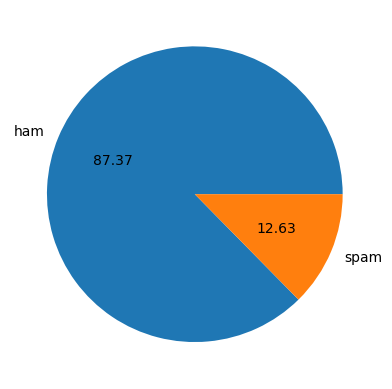

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(df['label'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [15]:
import nltk

In [21]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [17]:
df['num_characters'] = df['message'].apply(len)

In [18]:
df.head(5)

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head(5)

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentance'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head(5)

,label,message,num_characters,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df.columns

Index(['label', 'message', 'num_characters', 'num_words', 'num_sentance'], dtype='object')

In [28]:
df.describe()

,label,num_characters,num_words,num_sentance
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,79.344554,18.593538,1.974076
std,0.332253,58.437457,13.402779,1.458967
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,119.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [29]:
df[df['label']==0].describe()

,label,num_characters,num_words,num_sentance
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.905890,17.267715,1.827724
std,0.0,56.715046,13.588065,1.394338
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,53.000000,13.000000,1.000000
75%,0.0,91.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [30]:
df[df['label']==1].describe()

,label,num_characters,num_words,num_sentance
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.704441,27.762634,2.986217
std,0.0,29.821348,6.993008,1.494815
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

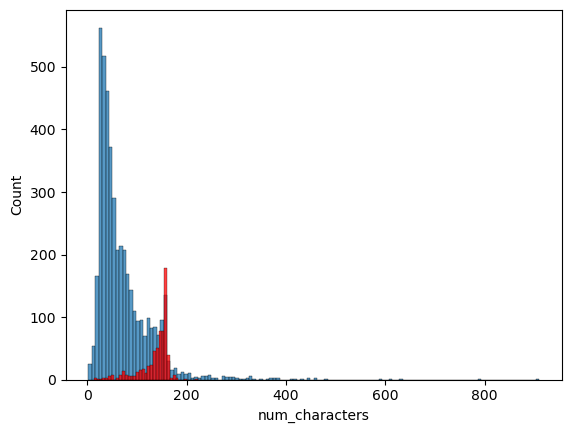

In [31]:
import seaborn as sns
sns.histplot(df[df['label']==0]['num_characters'])
sns.histplot(df[df['label']==1]['num_characters'],color = 'red')

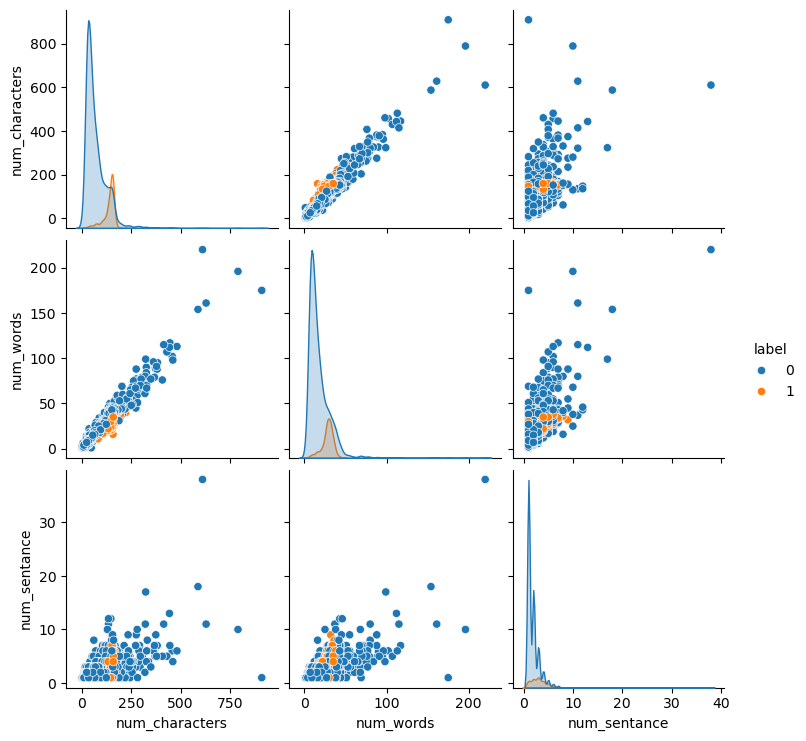

In [32]:
sns.pairplot(df,hue='label')

<Axes: >

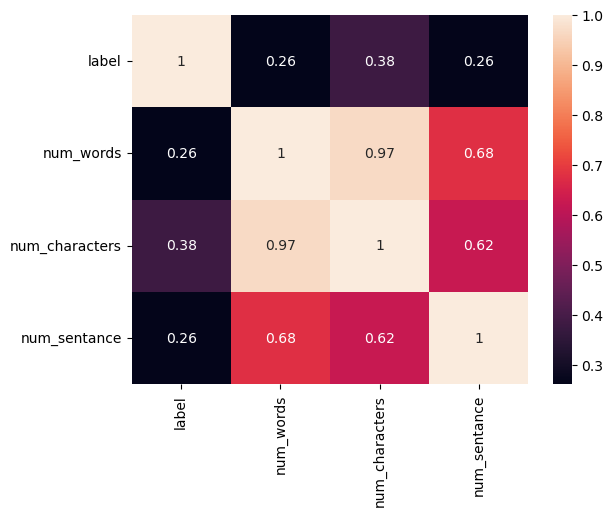

In [33]:
sns.heatmap(df[['label','num_words','num_characters','num_sentance']].corr(),annot = True)

**data preprocessing**


*   lower case
*   tokenize
*   remove punctuation
*   stop word removeal
*   staming








In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
stopwords.words('english')
ps = nltk.PorterStemmer()
ps.stem('running')

'run'

In [37]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['transformed_text'] = df['message'].apply(transform_text)

In [40]:
df.head(5)

,label,message,num_characters,num_words,num_sentance,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
df['transformed_num_words'] = df['transformed_text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [42]:
df.head(5)

,label,message,num_characters,num_words,num_sentance,transformed_text,transformed_num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,16
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,24
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,9
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,7


In [44]:
!pip install wordcloud

DEPRECATION: Loading egg at d:\anaconda3\lib\site-packages\iris_classification-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at d:\anaconda3\lib\site-packages\mashroom_classification-0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330



   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 217.9 kB/s eta 0:00:02
   -- ------------------------------------ 20.5/301.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 281.8 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 476.3 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 888.4 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 1.2 MB/s eta 0:00:00


In [45]:
import wordcloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

In [47]:
wc_ham = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep = " "))

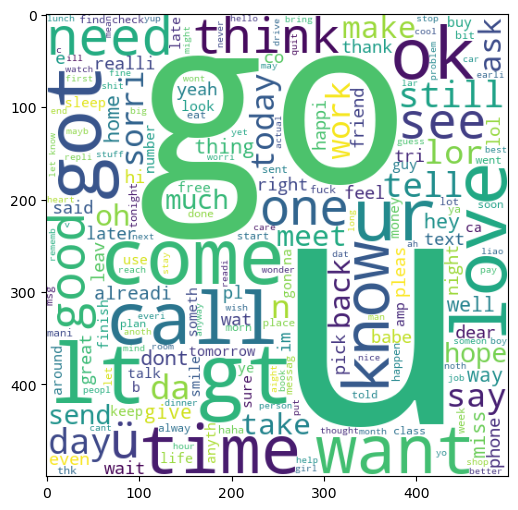

In [48]:
plt.figure(figsize = (15,6))
plt.imshow(wc_ham)

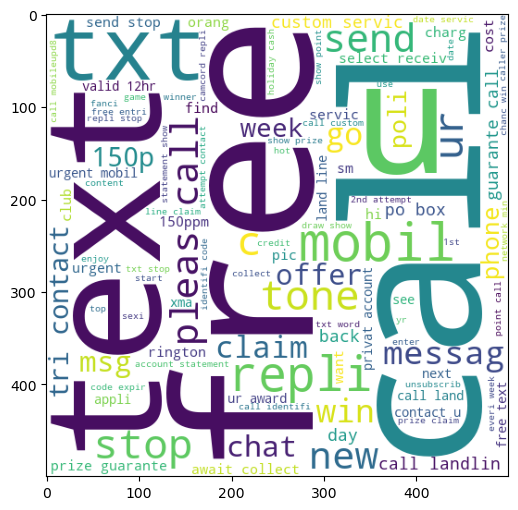

In [49]:
wc_ham = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(wc_ham)

In [50]:
spam_corpus = []
for msg in df[df['label']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [51]:
len(spam_corpus)

9982

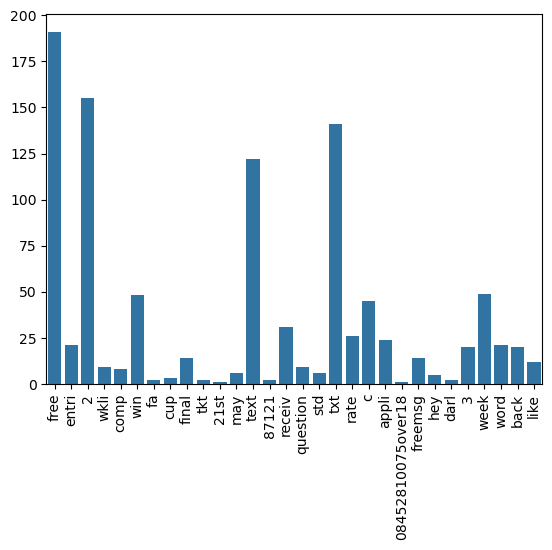

In [52]:
sns.barplot(pd.Series(nltk.FreqDist(spam_corpus)).head(30),)
plt.xticks(rotation = 'vertical')
plt.show()

In [53]:
ham_corpus = []
for msg in df[df['label']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

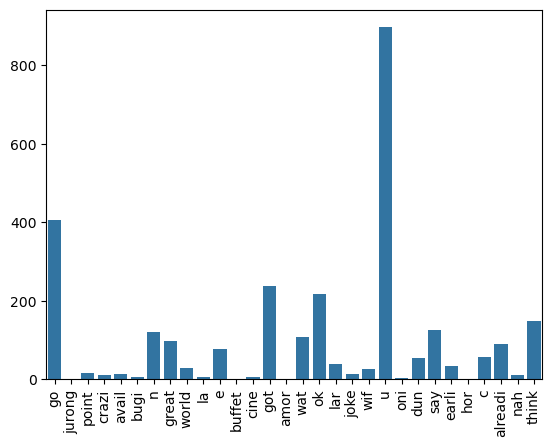

In [54]:
sns.barplot(pd.Series(nltk.FreqDist(ham_corpus)).head(30),)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [56]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
x.shape

(5169, 3000)

In [58]:
y = df['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [ ]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.868522815158546
[[980 144]
 [ 26 143]]
0.49825783972125437


In [64]:
mng = mnb.fit(X_train,y_train)
y_pred2 = mng.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.974477958236659
[[1124    0]
 [  33  136]]
1.0


In [65]:
bnb = bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9853054911059551
[[1123    1]
 [  18  151]]
0.993421052631579


In [67]:
import pickle
pickle.dump(bnb,open('../artifacts/model.pkl','wb'))
pickle.dump(tfidf,open("../artifacts/vectorizer.pkl",'wb'))